## 1. MODEL NUMÈRIC

In [1]:

import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Definir las capas convolucionales y de agrupamiento
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)  # Capa convolucional 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling 1

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)  # Capa convolucional 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling 2

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)  # Capa convolucional 3
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling 3

        self.fc1 = nn.Linear(128 * 8 * 5, 128)  # Capa densa
        self.dropout = nn.Dropout(0.5)  # Dropout para regularización
        self.fc2 = nn.Linear(128, 10)  # Capa de salida para 10 clases

    def forward(self, x):
        # Definir el paso hacia adelante
        x = self.pool1(F.relu(self.conv1(x)))  # Capa 1
        x = self.pool2(F.relu(self.conv2(x)))  # Capa 2
        x = self.pool3(F.relu(self.conv3(x)))  # Capa 3

        x = x.view(-1, 128 * 8 * 5)  # Aplanar la salida para la capa densa
        x = F.relu(self.fc1(x))  # Capa densa
        x = self.dropout(x)  # Aplicar dropout
        x = self.fc2(x)  # Capa de salida

        return x

In [2]:
# Load model

model_num = CNNModel()
model_num.load_state_dict(torch.load('models/CNN1-numeros.pt'))

C:\Users\mirvi\AppData\Local\Temp\ipykernel_13912\3119691653.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_num.load_state_dict(torch.load('models/CNN1-numeros.pt

<All keys matched successfully>

### Proves imatges

In [5]:
from torchvision import transforms

# Transformaciones necesarias para la imagen (redimensionar y normalizar)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Asegurarse de que la imagen esté en escala de grises
    transforms.Resize((64, 40)),  # Redimensionar a (altura, anchura)
    transforms.ToTensor(),  # Convertir a tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalizar entre -1 y 1 (si lo necesitas entre 0 y 1, elimina Normalize)
])

def predecir_imagen(model, image_path):
    # Cargar la imagen desde el path
    img = Image.open(image_path)
    
    # Aplicar las transformaciones
    img_tensor = transform(img)
    
    # Añadir una dimensión adicional para representar el batch (batch_size=1)
    img_tensor = img_tensor.unsqueeze(0)  # Cambia el tamaño a [1, 1, 64, 40]
    
    # Asegurarse de que el modelo está en modo de evaluación
    model.eval()
    
    # Deshabilitar gradientes para hacer predicción (no entrenar)
    with torch.no_grad():
        # Pasar la imagen por el modelo
        outputs = model(img_tensor)
        
        # Obtener la predicción con la mayor probabilidad
        _, predicted = torch.max(outputs, 1)
    
    # Devolver la predicción (como un número de clase)
    return predicted.item()


Predicted: 2


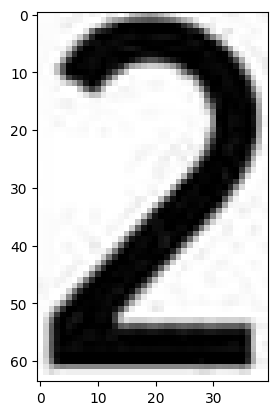

Predicted: 0


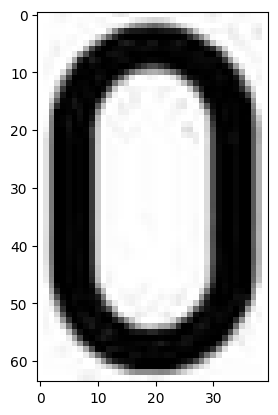

Predicted: 0


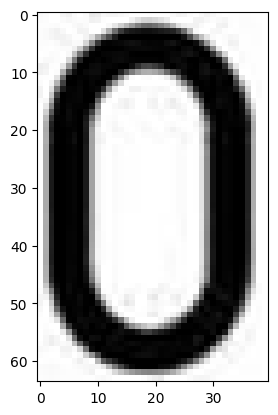

Predicted: 8


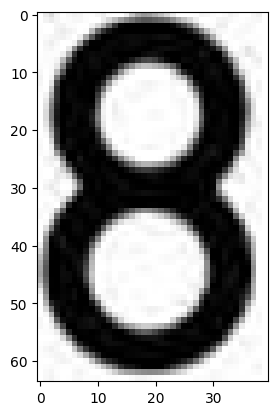

In [24]:
import os
from matplotlib import pyplot as plt

model_num.eval()

predicts = []

# Prenem nomes els numeros
n_nums = 0
path = 'digits_proves_retallades'

for filename in os.listdir(path):
    
    # Prenem nomes els numeros
    if n_nums > 3:
        break

    img_path = os.path.join(path, filename)
    prediction = predecir_imagen(model_num, img_path)
    predicts.append(prediction)

    # show image and prediction
    print(f'Predicted: {prediction}')
    img = Image.open(img_path)
    plt.imshow(img, cmap='gray')
    plt.show()

    n_nums += 1

    

## 2. MODEL ALFABÈTIC

In [17]:
class CNNModel_a(nn.Module):
    def __init__(self):
        super(CNNModel_a, self).__init__()

        # Definir las capas convolucionales y de agrupamiento
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)  # Capa convolucional 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling 1

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)  # Capa convolucional 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling 2

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)  # Capa convolucional 3
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling 3

        # Ajustar la capa fully connected para 26 clases
        self.fc1 = nn.Linear(128 * 8 * 5, 128)  # Capa densa
        self.dropout = nn.Dropout(0.5)  # Dropout para regularización
        self.fc2 = nn.Linear(128, 26)  # Capa de salida ajustada a 26 clases

    def forward(self, x):
        # Definir el paso hacia adelante
        x = self.pool1(F.relu(self.conv1(x)))  # Capa 1
        x = self.pool2(F.relu(self.conv2(x)))  # Capa 2
        x = self.pool3(F.relu(self.conv3(x)))  # Capa 3

        x = x.view(-1, 128 * 8 * 5)  # Aplanar la salida para la capa densa
        x = F.relu(self.fc1(x))  # Capa densa
        x = self.dropout(x)  # Aplicar dropout
        x = self.fc2(x)  # Capa de salida

        return x

In [18]:
# Load model

model_alfa = CNNModel_a()
model_alfa.load_state_dict(torch.load('models\CNN1-alfa.pt'))

C:\Users\mirvi\AppData\Local\Temp\ipykernel_13912\3856900743.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_alfa.load_state_dict(torch.load('models\CNN1-alfa.pt')

<All keys matched successfully>

Predicted: Z


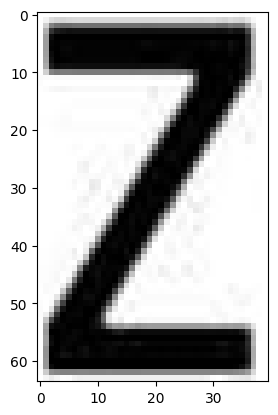

Predicted: G


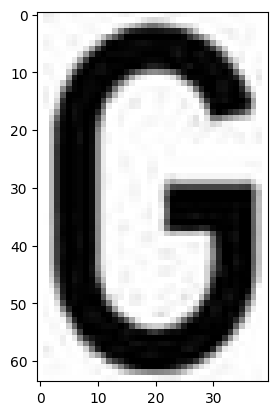

Predicted: Z


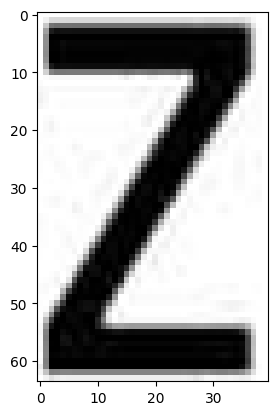

In [28]:
from matplotlib import pyplot as plt

model_alfa.eval()

predicts = []

# Prenem nomes els numeros
n_nums = 0
for filename in os.listdir(path):
    
    # Prenem nomes els numeros
    if n_nums > 3:
        img_path = os.path.join(path, filename)
        prediction = predecir_imagen(model_alfa, img_path)
        predicted_letter = chr(prediction + ord('A'))
        predicts.append(predicted_letter)

        # show image and prediction
        print(f'Predicted: {predicted_letter}')
        img = Image.open(img_path)
        plt.imshow(img, cmap='gray')
        plt.show()

    n_nums += 1


'Z'